# Local Outlier Factor
---
_Dans les applications KDD(Knowledge Discovery in Database) les exceptions ou outliers peuvent être riches d'informations. Pour détecter ce genre d'informations par localité on utilise l'algorithme de Local Outlier Factor qui extrait des anomalies locales en déterminant un facteur par rapport à une distance-k entre un élément ciblé et la densité des voisins à portées. Dans notre cas les outliers que l'on souhaite trouver sont des cas rares, de l'ordre 1/10000 si ce n'est plus.
 De plus, son application basique consiste à dire si un élément est ou non un outlier que l'on essayera ici avec la librairie sklearn, mais il est également possible de faire une application plus fine en donnant une probabilité à chaque élément d'être un outlier_

---
Création de dataset de sélection avec l'algorithme Local Outlier Factor en fonction du nombre de dimensions de la vectorisation et du nombre de voisins utilisés pour déterminer la région locale.
        
  1. Préparation des données
  2. Creation des vecteurs de données
  3. Réduction en deux dimensions
  4. Application de LOF
  5. Création des données d'outlier locaux

---

### 1. Préparation des données
- importation des libraries nécessaires numpy, gensim, sklearn, matplotlib:

In [1]:
import random
import numpy as np
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

- Dossier et dataset:

In [2]:
brut = "MillionTweets_NEFU.txt"
clean = "MillionTweetsMinStp_NEFU.txt"
std = "MillionTweetsStd_NEFU.txt"
lem = "MillionTweetsLem_NEFU.txt"

---

### 2. Creation des vecteurs de données (Word2vec)
_"Numérise" les phrases en vecteurs de x dimensions de plongement lexical (word embedding), chaque mot devient alors un vecteur composé de dimensions exprimées en valeurs numériques._
- Création d'un model en fonction du nombre dimensions, entraine le model et encode les vecteurs de données:  
    _On utilisera deux versions du jeu de données, une version avec stemming et l'autre lemmatisé_

In [3]:
%%time 
#300 dimensions
model_300 = Word2Vec(corpus_file=std, vector_size=300, window=5, min_count=2, workers=8, sg=1)

Wall time: 1min 17s


In [4]:
wv = model_300.wv
wv.save("w2vec_model_d300")

In [5]:
model300 = KeyedVectors.load("w2vec_model_d300")
model300_dim = 300

_chargement en mémoire des données nécessaires_

In [6]:
#Version avec stemming
with open(std, "r") as file:
    lines = file.readlines()
    
FormatDataset_stem = [line.split() for line in lines]

#Version avec lemmatisation
with open(lem, "r") as file:
    lines = file.readlines()
    
FormatDataset_lem = [line.split() for line in lines]

#Donné néttoyé
with open(clean, "r") as file:
    lines = file.readlines()
    
RawData = [line for line in lines]

In [7]:
def encode(msg, model, dim):
    """
        Encode un message:
    Args:
        msg (string): une chaîne de caractère correspondant aux données à encodées
        model (array): modéle d'encodage
        dim: nombre de dimensions nécessaires

    Returns:
        array d'int: vecteur de données encodées
    
    """
    return np.mean([model[word] for word in msg if word in model] or [np.zeros(dim)], axis = 0)

In [8]:
%%time
dataset_stem_encoded = np.array([encode(msg, model300, model300_dim) for msg in FormatDataset_stem])

Wall time: 29.2 s


In [9]:
%%time
dataset_lem_encoded = np.array([encode(msg, model300, model300_dim) for msg in FormatDataset_lem])

Wall time: 24.8 s


_test:_

In [10]:
print(dataset_stem_encoded[12])

[-0.00245699  0.17687112 -0.05337418 -0.24208559 -0.01537523  0.02350357
  0.16441813  0.15185778  0.17990363 -0.01384475 -0.03446126 -0.03881244
  0.0772502   0.10726573  0.04604407  0.01222413  0.4284589   0.20987037
  0.02390583  0.2315096   0.16810365  0.07019548  0.09259997 -0.02454173
 -0.08602148  0.11852762 -0.18086217  0.02927102 -0.09247293 -0.24894308
 -0.0535876  -0.01419892 -0.04618927  0.1025952  -0.04384244 -0.10763471
 -0.13565621 -0.13830121 -0.2292293   0.13004468  0.12863609  0.02377105
  0.04287455  0.16580667  0.35426623  0.35172883  0.16483819 -0.07830458
  0.1090873   0.05163774 -0.03341425 -0.01793152  0.14959012 -0.1342174
 -0.07819145  0.18359832  0.17229763  0.24358445  0.02178308  0.12241032
 -0.15699808  0.04970903  0.17939118  0.05930629  0.09340981  0.02477052
  0.1159943   0.01448566  0.0855033  -0.0314359  -0.09217632  0.06988289
  0.08942783 -0.02991648  0.10987035  0.27052844 -0.33092934 -0.03998023
 -0.05175276 -0.13409504 -0.24058007  0.05383687  0.

In [11]:
print(dataset_lem_encoded[12])

[-0.00245699  0.17687112 -0.05337418 -0.24208559 -0.01537523  0.02350357
  0.16441813  0.15185778  0.17990363 -0.01384475 -0.03446126 -0.03881244
  0.0772502   0.10726573  0.04604407  0.01222413  0.4284589   0.20987037
  0.02390583  0.2315096   0.16810365  0.07019548  0.09259997 -0.02454173
 -0.08602148  0.11852762 -0.18086217  0.02927102 -0.09247293 -0.24894308
 -0.0535876  -0.01419892 -0.04618927  0.1025952  -0.04384244 -0.10763471
 -0.13565621 -0.13830121 -0.2292293   0.13004468  0.12863609  0.02377105
  0.04287455  0.16580667  0.35426623  0.35172883  0.16483819 -0.07830458
  0.1090873   0.05163774 -0.03341425 -0.01793152  0.14959012 -0.1342174
 -0.07819145  0.18359832  0.17229763  0.24358445  0.02178308  0.12241032
 -0.15699808  0.04970903  0.17939118  0.05930629  0.09340981  0.02477052
  0.1159943   0.01448566  0.0855033  -0.0314359  -0.09217632  0.06988289
  0.08942783 -0.02991648  0.10987035  0.27052844 -0.33092934 -0.03998023
 -0.05175276 -0.13409504 -0.24058007  0.05383687  0.

---

### 3. Réduction en deux dimensions (PCA)
_Principal component analysis (PCA): reduction linéaire de dimension par extraction de deux nouvelles dimensions. L’objectif de l’extraction de caractéristiques est de représenter le plus fidèlement possible les échantillons dans un espace de plus faible dimension._

- Création des models en fonction du nombre dimensions:  


_Version avec stemming_

In [12]:
%%time
pca = PCA(n_components=2)
model2d_stem = pca.fit_transform(dataset_stem_encoded)

Wall time: 11.1 s


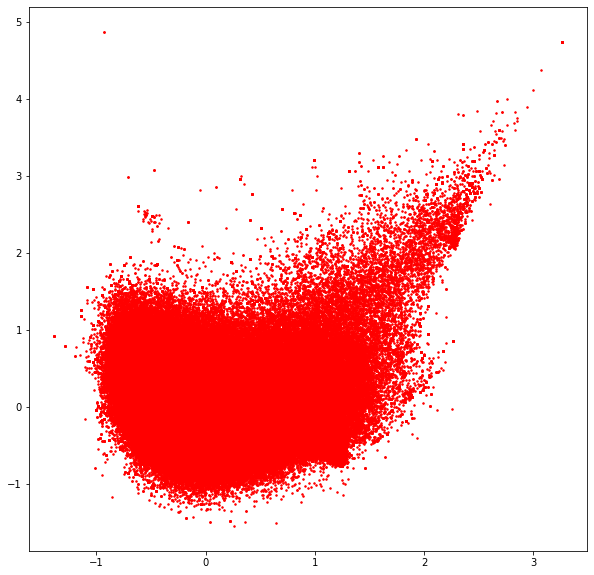

In [13]:
a = model2d_stem.T

#Taille des figures
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["lines.markersize"] = 3

plt.plot(a[0], a[1], 'r.')
plt.show()

_Version avec lemmatisation_

In [14]:
%%time
pca = PCA(n_components=2)
model2d_lem = pca.fit_transform(dataset_lem_encoded)

Wall time: 10.6 s


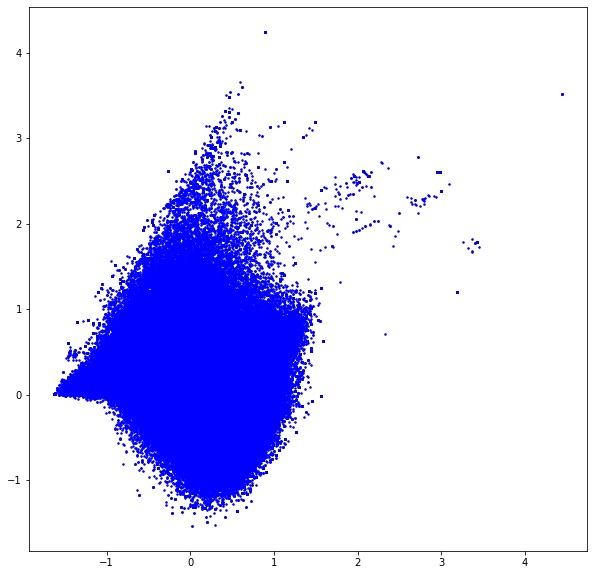

In [15]:
b = model2d_lem.T
plt.plot(b[0], b[1], 'b.')
plt.show()

_comparaison_

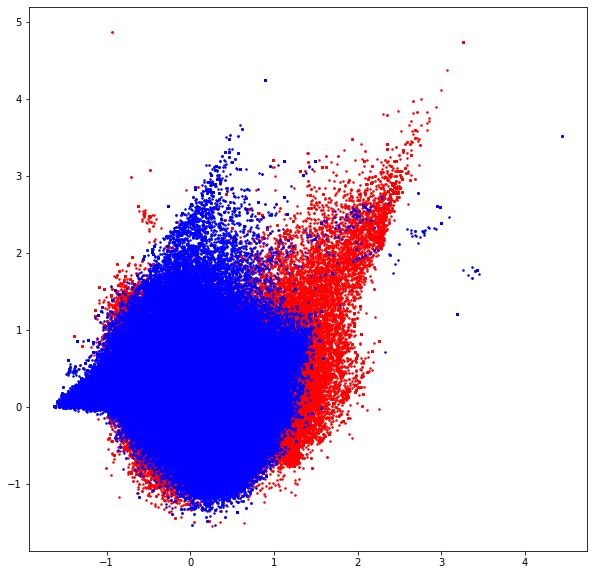

In [16]:
plt.plot(a[0], a[1], 'r.')
plt.plot(b[0], b[1], 'b.')
plt.show()

---

## 4. Application de LOF
---
 Le local Oultier Factor considére le nombre de voisins d'un point sur une distance K, les K-neighnors dans la zone de rayon distance k autour du point inspecté sont comparés à la moyenne de voisins de tous les points dans une zone de rayon distance k. si le résultat du calcul est supérieur à 1, le point current est un outlier. La distance dans l'implémentation de sklearn est déterminée en fonction des plus proches voisins.

---
- Illustration:

_sélection de points du model avec stemming_

In [17]:
Test_outlier = model2d_stem[1042]
Test_outlier2 = model2d_stem[2]

_Exemple avec k = 1 d'un point normal_

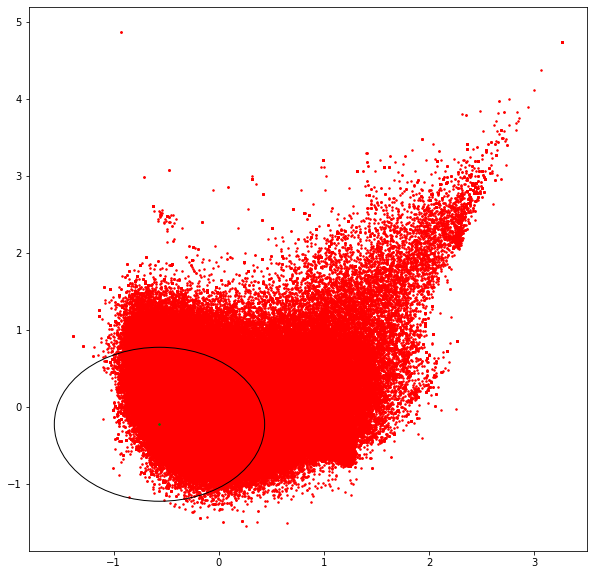

In [18]:
a = Test_outlier.T
b = model2d_stem.T

plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["lines.markersize"] = 3

plt.plot(a[0], a[1], 'g.', zorder=2)
plt.plot(b[0], b[1], 'r.', zorder=1)

#cercle de rayon comprenant les voisin à distance K
ka = plt.Circle(a, 1, fill = False, zorder=20)

fig = plt.gcf()
ax = fig.gca()

ax.add_patch(ka)
plt.show()

_Exemple avec k = 1 d'un point considéré comme outlier_

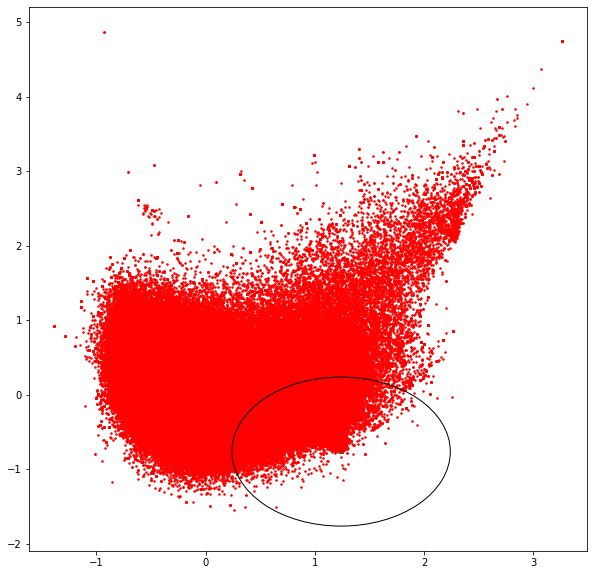

In [19]:
a = Test_outlier2.T
b = model2d_stem.T

plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["lines.markersize"] = 3

plt.plot(a[0], a[1], 'g.', zorder=2)
plt.plot(b[0], b[1], 'r.', zorder=1)

#cercle de rayon comprenant les voisin à distance K
ka = plt.Circle(a, 1, fill = False, zorder=20)

fig = plt.gcf()
ax = fig.gca()

ax.add_patch(ka)
plt.show()

- Training:

In [20]:
clf = LocalOutlierFactor(n_neighbors=2)

In [21]:
clf2 =  LocalOutlierFactor(n_neighbors=3)

In [22]:
clf3 =  LocalOutlierFactor(n_neighbors=4)

- Predict:

_sur les données avec stemming_

In [23]:
%%time
stem2 = clf.fit_predict(model2d_stem)

Wall time: 10.2 s


In [24]:
%%time
stem3 = clf2.fit_predict(model2d_stem)

Wall time: 9.8 s


In [25]:
%%time
stem4 = clf3.fit_predict(model2d_stem)

Wall time: 10 s


_sur les données avec lemmatisation_

In [26]:
%%time
lem2 = clf.fit_predict(model2d_lem)

Wall time: 2min 37s


In [27]:
%%time
lem3 = clf2.fit_predict(model2d_lem)

Wall time: 2min 38s


In [28]:
%%time
lem4 = clf3.fit_predict(model2d_lem)

Wall time: 2min 40s


---

## 5. Création des données

In [46]:
def SaveLofSelect(file, index, datas):
    with open(file, 'a') as out:
        for i,e in enumerate(index):
            if e<0:
                out.write(datas[i])

In [47]:
outlier="outlier_stemk2.txt"
SaveLofSelect(outlier, stem2, RawData)

In [ ]:
outlier="outlier_stemk3.txt"
SaveLofSelect(outlier, stem3, RawData)

In [ ]:
outlier="outlier_stemk4.txt"
SaveLofSelect(outlier, stem4, RawData)

In [ ]:
outlier="outlier_lemk2.txt"
SaveLofSelect(outlier, lem2, RawData)

In [ ]:
outlier="outlier_lemk3.txt"
SaveLofSelect(outlier, lem3, RawData)

In [ ]:
outlier="outlier_lemk4.txt"
SaveLofSelect(outlier, lem4, RawData)

---